<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>APRENDIZADO DE MÁQUINA (CIC1205) - Trabalho 2</center></h1>

- Nome completo: MATHEUS SANTOS MELO
- Matrícula: 2430148MCICMA
- [Link para vídeo](https://cefetrjbr-my.sharepoint.com/:v:/g/personal/18888284710_cefet-rj_br/EVKdfxdq6epJjx2ns4rxYtIBLW-OZufNVc10ZvPnMGGFhw?e=x38xWU&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJTdHJlYW1XZWJBcHAiLCJyZWZlcnJhbFZpZXciOiJTaGFyZURpYWxvZy1MaW5rIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXcifX0%3D)

- Para esse trabalho, utilizei a versão do Python 3.12.4.

## 0. Importação das bibliotecas para todas as questões

In [1]:
# Manipulação de Dados
import pandas as pd
import numpy as np

# Visualização de Dados
import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.graph_objects as go

# Utilitários
import pickle
import warnings

# Para ignorar mensagens de aviso
warnings.filterwarnings(action='ignore')

# Parâmetro para utilizar no random_state por fins de reprodutibilidade
seed = 123

## 1. Engenharia de Features

- Para essa questão, irei criar alguns atributos derivados que façam sentido e depois irei analisá-los para saber se tem uma relação com a variável-alvo.

### Descrição dos dados (Fonte: [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds)):

- **price**: price in US dollars ($326--$18,823)

- **carat**: weight of the diamond (0.2--5.01)

- **cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- **color**: diamond colour, from J (worst) to D (best)

- **clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- **x**: length in mm (0--10.74)

- **y**: width in mm (0--58.9)

- **z**: depth in mm (0--31.8)

- **depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- **table**: width of top of diamond relative to widest point (43--95)

In [2]:
diamonds = pd.read_csv('../data/diamonds.csv', index_col=0)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Feature 1: Volume do diamante

- Justificativa: O volume é uma medida física tridimensional, e pode representar melhor o "corpo" real do diamante, principalmente quando existem variações no formato que não são bem explicadas só pelo `carat`.

- Variáveis utilizadas: `x`, `y`, `z` 

In [3]:
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

In [ ]:
fig = sp.make_subplots(rows=1, cols=2, horizontal_spacing=0.1, subplot_titles=['Scatterplot', 'Heatmap'])

# Primeiro subplot
fig.add_trace(go.Scatter(x= diamonds['volume'], y=diamonds['price'], mode='markers'), row=1, col=1)

# Segundo subplot
fig.add_trace(go.Heatmap(z = diamonds[['volume', 'price']].corr(), zmin=-1, zmax=1, 
                         x = ['volume', 'price'], y = ['volume', 'price'], texttemplate="%{z:.3f}", coloraxis="coloraxis"), row=1, col=2)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(xaxis1_title="volume", yaxis1_title="price", height=400, width=1250, coloraxis={'colorscale': 'Turbo', 'cmin': -1, 'cmax': 1}, 
                  title= 'Análise exploratória entre a feature criada e o preço')

fig.show('png') 

- Podemos observar que o processo de Feature Engineering para criação da variável de volume tem uma correlação positiva não-linear alta em relação ao preço do diamante. Ou seja, quanto maior for o volume do diamante, maior o preço, o que faz sentido seguindo a lógica que o preço aumenta conforme o valor do diamanete. 

- O ponto interessante é que como foi imaginado, o valor do diamante aumenta de uma maneira exponencial de acordo com o seu volume, o que pode ser visto a partir do gráfico de dispersão acima.

- Sendo assim, é uma boa variável para ser considerada para o modelo preditivo.

In [ ]:
"""import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Scatterplot com trendline via px
fig_px = px.scatter(diamonds, x='volume', y='price', trendline='lowess', trendline_color_override='red')

# Extrair traces do plotly express
scatter_trace = fig_px.data[0]      # Pontos
trendline_trace = fig_px.data[1]    # Linha lowess

# Criar subplots
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.1, subplot_titles=['Scatterplot', 'Heatmap'])

# Adicionar scatter e trendline no primeiro subplot
fig.add_trace(scatter_trace, row=1, col=1)
fig.add_trace(trendline_trace, row=1, col=1)

# Adicionar heatmap no segundo subplot
corr_matrix = diamonds[['volume', 'price']].corr()
fig.add_trace(go.Heatmap(z=corr_matrix.values,
                         x=['Volume', 'Preço'],
                         y=['Volume', 'Preço'],
                         zmin=-1, zmax=1,
                         texttemplate="%{z:.3f}",
                         coloraxis="coloraxis"),
              row=1, col=2)

# Layout geral
fig.update_layout(
    height=400, width=1250,
    coloraxis={'colorscale': 'Turbo', 'cmin': -1, 'cmax': 1},
    title='Análise exploratória entre a feature criada e o preço'
)

fig.show()"""

KeyboardInterrupt: 

### Features 2 e 3: Quilate com transformação logarítmica e polinomial

- Justificativa: A transformação logarítmica e polinomial de `carat` pode ajudar a linearizar sua relação com o preço, além de possivelmente reduzir o impacto de outliers e capturar eventuais efeitos não lineares do peso sobre o valor do diamante. Criarei as duas features pois minha intenção é testar essa abordagem de transformação tanto de forma logarítimica quanto polinomial e ver qual possui melhor relação com o target.

- Variável utilizada: `carat`

In [6]:
import math

def apply_log(X):
    return math.log(X, 10) 

def apply_poly(X):
    return X**2

diamonds['log_carat'] = diamonds['carat'].apply(lambda k: apply_log(k))
diamonds['carat²'] = diamonds['carat'].apply(lambda k: apply_poly(k))

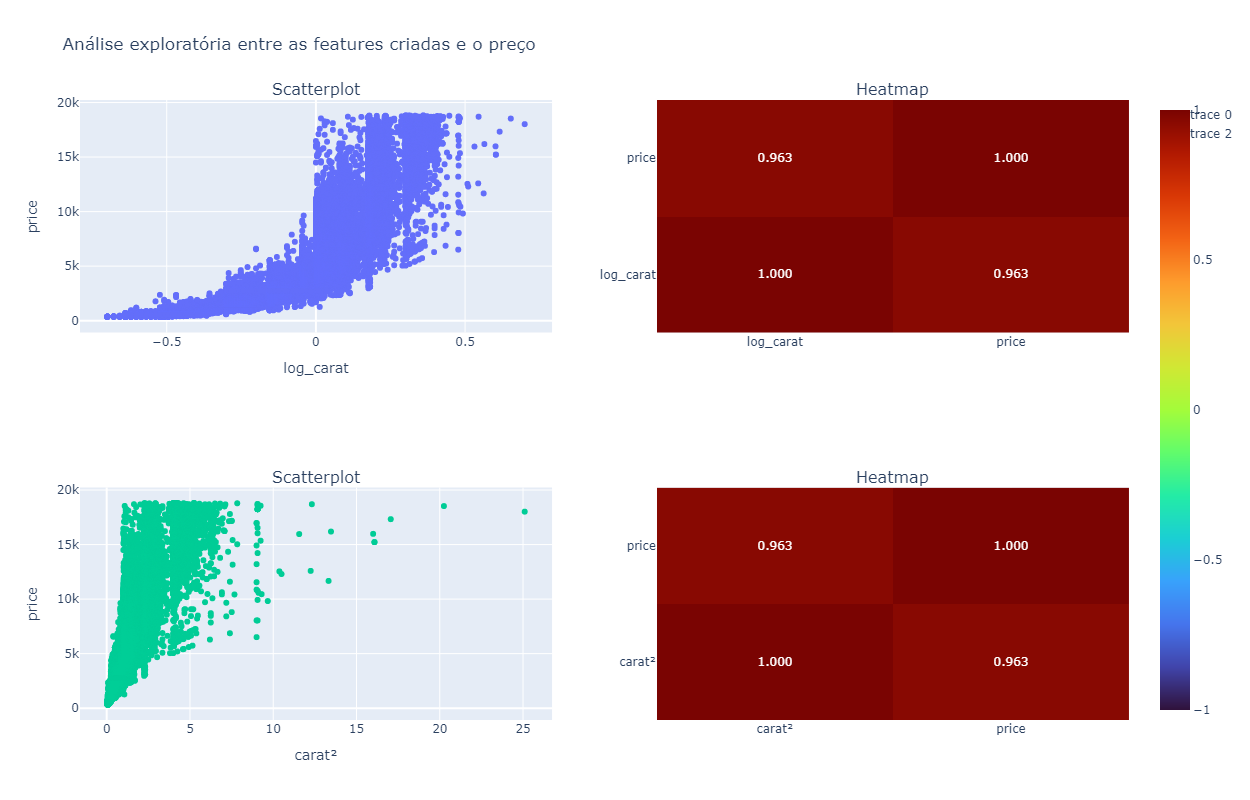

In [16]:
fig = sp.make_subplots(rows=2, cols=2, horizontal_spacing=0.1, subplot_titles=['Scatterplot', 'Heatmap', 'Scatterplot', 'Heatmap'], vertical_spacing=0.25)

# Primeiro subplot
fig.add_trace(go.Scatter(x= diamonds['log_carat'], y=diamonds['price'], mode='markers'), row=1, col=1)

# Segundo subplot
fig.add_trace(go.Heatmap(z = diamonds[['log_carat', 'price']].corr('spearman'), zmin=-1, zmax=1, 
                         x = ['log_carat', 'price'], y = ['log_carat', 'price'], texttemplate="%{z:.3f}", coloraxis="coloraxis"), row=1, col=2)

# Terceiro subplot
fig.add_trace(go.Scatter(x= diamonds['carat²'], y=diamonds['price'], mode='markers'), row=2, col=1)

# Quarto subplot
fig.add_trace(go.Heatmap(z = diamonds[['carat²', 'price']].corr('spearman'), zmin=-1, zmax=1, 
                         x = ['carat²', 'price'], y = ['carat²', 'price'], texttemplate="%{z:.3f}", coloraxis="coloraxis"), row=2, col=2)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(xaxis1_title="log_carat", yaxis1_title="price", xaxis3_title="carat²", yaxis3_title="price", 
                  height=800, width=1250, coloraxis={'colorscale': 'Turbo', 'cmin': -1, 'cmax': 1}, 
                  title= 'Análise exploratória entre as features criadas e o preço')

fig.show('png') 

- Acima foram feitas as transformações da variável `carat` por meio da transformação logarítmica e quadrática, gerando duas novas variáveis. Considerando esse contexto, faz sentido que essas variáveis apresentem relações não lineares (como observado nos gráficos de dispersão). Por esse motivo, foi aplicada a correlação de Spearman no heatmap, uma vez que ela é adequada para capturar relações monotônicas, que podem ser não lineares. Diferentemente da correlação de Pearson, que assume uma relação linear e exige que ambas as variáveis possuam distribuição aproximadamente normal.

- A respeito das correlações, observa-se uma correlação positiva, monotônica e alta para ambas as variáveis, assim como foi observado anteriormente com a feature volume. Como ambas as variáveis são transformações diferentes da variável `carat` em escalas distintas, seus valores numéricos no gráfico de dispersão são diferentes, mas a correlação permanece praticamente a mesma, já que ambas medem essencialmente a mesma informação. 

- Portanto, seria interessante considerar uma ou outra na próxima etapa de modelagem preditiva, evitando a inclusão simultânea devido à alta multicolinearidade entre elas.

### Classificação Ordinal Multi-classes